<a href="https://colab.research.google.com/github/DJCordhose/buch-machine-learning-notebooks/blob/master/kap3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kapitel 3: Datenimport und -vorbereitung

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from distutils.version import StrictVersion

In [4]:
import pandas as pd
print(pd.__version__)

assert StrictVersion(pd.__version__) >= StrictVersion('0.19.0')

1.5.3


In [5]:
import seaborn as sns
print(sns.__version__)

assert StrictVersion(sns.__version__) >= StrictVersion('0.7.0')

0.12.2


## Zuerst laden wir den Iris Datensatz und verschaffen uns einen ersten Eindruck
https://de.wikipedia.org/wiki/Portal:Statistik/Datensaetze#Iris

In [6]:
!curl -O https://raw.githubusercontent.com/DJCordhose/ml-examples/master/datasets/Iris/iris_dirty.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4829  100  4829    0     0   181k      0 --:--:-- --:--:-- --:--:--  181k


In [7]:
!ls -l

total 20
-rw-r--r-- 1 root root 4607 May 30 07:16 iris_cleaned.csv
-rw-r--r-- 1 root root 4829 May 30 07:16 iris_dirty.csv
drwxr-xr-x 1 root root 4096 May 25 13:42 sample_data


In [8]:
!head iris_dirty.csv 

5.1,3.5,1.4,2 mm,Iris-setosa
4.9,3.0,1.4,2 mm,Iris-setosa
4.7,3.2,1.3,2 mm,Iris-setosa
4.6,3.1,1.5,2 mm,Iris-setosa
5.0,3.6,1.4,2 mm,Iris-setosa
5.4,3.9,1.7,4 mm,Iris-setosa
4.6,3.4,1.4,3 mm,Iris-setosa
5.0,3.4,1.5,2 mm,Iris-setosa
4.4,2.9,1.4,2 mm,Iris-setosa
4.9,3.1,1.5,1 mm,Iris-setosa


In [9]:
df = pd.read_csv('iris_dirty.csv',
                 header=None,
                 encoding='iso-8859-15',
                 names=['sepal length', 'sepal width', 'petal length', 'petal width', 'class'])

In [10]:
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,2 mm,Iris-setosa
1,4.9,3.0,1.4,2 mm,Iris-setosa
2,4.7,3.2,1.3,2 mm,Iris-setosa
3,4.6,3.1,1.5,2 mm,Iris-setosa
4,5.0,3.6,1.4,2 mm,Iris-setosa


In [11]:
df.count()

sepal length    151
sepal width     150
petal length    151
petal width     151
class           151
dtype: int64

## Exkurs: Datenstrukturen in Pandas

### Series

In [12]:
# Series ist einfach eine Liste von Daten
s1 = pd.Series([10,20,30])

In [13]:
type(s1)

pandas.core.series.Series

In [14]:
# Wenn kein Index angegeben ist, wird einfach fortlaufend durchnummeriert
s1

0    10
1    20
2    30
dtype: int64

In [15]:
# Du kannst den Index aber auch angeben, entweder über Paare von Name und Wert
s2 = pd.Series({'a' : 10, 'b' : 20, 'c' : 30})
s2

a    10
b    20
c    30
dtype: int64

In [16]:
# oder als extra Parameter
s3 = pd.Series([10,20,30], index=['a', 'b', 'c'])
s3

a    10
b    20
c    30
dtype: int64

In [17]:
# mit dem []-Operator kommst du an einzelne Werte über ihre Position (nicht Index) heran
s3[0]

10

In [18]:
# Der Index geht aber auch
s3['a']

10

In [19]:
# oder du machst explizit womit du die Daten herausbekommen willst
s3.loc['a']

10

In [20]:
s3.iloc[0]

10

In [21]:
# Mehrere Werte gehen auch
s3[['a', 'c']]

a    10
c    30
dtype: int64

In [22]:
# Wertebereiche trennst du mit einem Doppelpunkt, der erste Startwert ist inklusiv, der Endwert exklusiv  
s3[0:2]

a    10
b    20
dtype: int64

In [23]:
# Wenn der Startwert 0 ist kannst du ihn auch weglassen
s3[:2]

a    10
b    20
dtype: int64

In [24]:
# Wenn du den Endwert weglässt, bekommst du alle Werte ab dem Startwert
s3[1:]

b    20
c    30
dtype: int64

#### Fortgeschrittenes

In [25]:
# Du kannst auch eine Funktion angeben, die bestimmt, welche Wert du haben möchtest
s3[lambda value: value == 20]

b    20
dtype: int64

In [26]:
# falls du dich fragst, wieso das der []-Operator das kann: er ist für die Series überladen
# hier ein einfaches Beispiel, wie sowas geht
# http://stackoverflow.com/questions/1957780/how-to-override-operator
class MyClass:
    def __getitem__(self, key):
        return key * 2
myobj = MyClass()
myobj[3]

6

### Dataframes

In [27]:
# Ein DateFrame besteht aus mehreren Series, diese haben typischerweise, aber nicht notwendigerweise, denselben Index

df1 = pd.DataFrame(
    {'one': pd.Series([10,20,30], index=['a', 'b', 'c']),
     'two': pd.Series([10,20,30], index=['a', 'b', 'c'])
    })

In [28]:
type(df1)

pandas.core.frame.DataFrame

In [29]:
df1

,one,two
a,10,10
b,20,20
c,30,30


In [30]:
# du kannst dir jederzeit auch Dokumentation für alle Klassen und Funktionen anzeigen lassen
# pd.DataFrame?

In [31]:
# Series haben Labels, über diese kommst du an die einzelnen Series

In [32]:
s4 = df1['one']

In [33]:
type(s4)

pandas.core.series.Series

In [34]:
# Series kennst du bereits von oben
s4['a']

10

In [35]:
# du kannst aber auch einen kombinierten Zugriff formulieren
df1['one']['a']

10

## Weiter im Thema: Fehlende Werte herausfinden und korrigieren

In [36]:
df['sepal width']

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
146    3.0
147    2.5
148    3.0
149    3.4
150    3.0
Name: sepal width, Length: 151, dtype: float64

In [37]:
df['sepal width'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
146    False
147    False
148    False
149    False
150    False
Name: sepal width, Length: 151, dtype: bool

In [38]:
df[df['sepal width'].isnull()]

,sepal length,sepal width,petal length,petal width,class
82,5.8,NaN,3.9,12 mm,Iris-versicolor


In [39]:
iris_versicolor = df[df['class']  == 'Iris-versicolor']
iris_versicolor

,sepal length,sepal width,petal length,petal width,class
50,7.0,3.2,4.7,14 mm,Iris-versicolor
51,6.4,3.2,4.5,15 mm,Iris-versicolor
52,6.9,3.1,4.9,15 mm,Iris-versicolor
53,5.5,2.3,4.0,13 mm,Iris-versicolor
54,6.5,2.8,4.6,15 mm,Iris-versicolor
55,5.7,2.8,4.5,13 mm,Iris-versicolor
56,6.3,3.3,4.7,16 mm,Iris-versicolor
57,4.9,2.4,3.3,10 mm,Iris-versicolor
58,6.6,2.9,4.6,13 mm,Iris-versicolor
59,5.2,2.7,3.9,14 mm,Iris-versicolor


In [40]:
iris_versicolor_sepal_width = iris_versicolor['sepal width']
iris_versicolor_sepal_width

50     3.2
51     3.2
52     3.1
53     2.3
54     2.8
55     2.8
56     3.3
57     2.4
58     2.9
59     2.7
60     2.0
61     3.0
62     2.2
63     2.9
64     2.9
65     3.1
66     3.0
67     2.7
68     2.2
69     2.5
70     3.2
71     2.8
72     2.5
73     2.8
74     2.9
75     3.0
76     2.8
77     3.0
78     2.9
79     2.6
80     2.4
81     2.4
82     NaN
83     2.7
84     3.0
85     3.4
86     3.1
87     2.3
88     3.0
89     2.5
90     2.6
91     3.0
92     2.6
93     2.3
94     2.7
95     3.0
96     2.9
97     2.9
98     2.5
99     2.8
100    3.2
Name: sepal width, dtype: float64

In [41]:
meanSepalWidth = pd.Series.mean(iris_versicolor_sepal_width)
meanSepalWidth

2.78

In [42]:
df.loc[82]

sepal length                5.8
sepal width                 NaN
petal length                3.9
petal width               12 mm
class           Iris-versicolor
Name: 82, dtype: object

In [43]:
df.loc[82,'sepal width'] = meanSepalWidth

In [44]:
df.loc[82]

sepal length                5.8
sepal width                2.78
petal length                3.9
petal width               12 mm
class           Iris-versicolor
Name: 82, dtype: object

In [45]:
df.count()

sepal length    151
sepal width     151
petal length    151
petal width     151
class           151
dtype: int64

## Dubletten finden und löschen

In [46]:
df[df.duplicated(keep=False)]

,sepal length,sepal width,petal length,petal width,class
9,4.9,3.1,1.5,1 mm,Iris-setosa
34,4.9,3.1,1.5,1 mm,Iris-setosa
37,4.9,3.1,1.5,1 mm,Iris-setosa
50,7.0,3.2,4.7,14 mm,Iris-versicolor
100,7.0,3.2,4.7,14 mm,Iris-versicolor


In [47]:
df.groupby('class').count()

,sepal length,sepal width,petal length,petal width
class,,,,
Iris-setosa,49,49,49,49
Iris-setsoa,1,1,1,1
Iris-versicolor,51,51,51,51
Iris-virginica,50,50,50,50


In [48]:
df = df.drop(df.index[[100]])

In [49]:
df.groupby('class').count()

,sepal length,sepal width,petal length,petal width
class,,,,
Iris-setosa,49,49,49,49
Iris-setsoa,1,1,1,1
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


## Zeichendreher / Tippfehler

In [50]:
df[df['class']  == 'Iris-setsoa']

,sepal length,sepal width,petal length,petal width,class
49,5.0,3.3,1.4,2 mm,Iris-setsoa


In [51]:
df.loc[49,'class'] = 'Iris-setosa'

In [52]:
df.groupby('class').count()

,sepal length,sepal width,petal length,petal width
class,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


In [53]:
print(df.groupby('class').count())

                 sepal length  sepal width  petal length  petal width
class                                                                
Iris-setosa                50           50            50           50
Iris-versicolor            50           50            50           50
Iris-virginica             50           50            50           50


## Uneinheitliche Einheiten

In [54]:
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,2 mm,Iris-setosa
1,4.9,3.0,1.4,2 mm,Iris-setosa
2,4.7,3.2,1.3,2 mm,Iris-setosa
3,4.6,3.1,1.5,2 mm,Iris-setosa
4,5.0,3.6,1.4,2 mm,Iris-setosa


In [55]:
pd.to_numeric('2 mm'.replace(' mm', '')) / 10

0.2

In [56]:
def convert_from_mm(row):
    return pd.to_numeric(row['petal width'].replace(' mm', '')) / 10

In [57]:
df['petal width'] = df.apply(convert_from_mm, axis='columns')

In [58]:
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Unplausible Daten (Ausreißer)

In [59]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,6.191333,3.054533,3.758667,1.198667
std,4.338310,0.433205,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,58.000000,4.400000,6.900000,2.500000


In [60]:
df.groupby('class').describe()

sepal length                                              \
                       count   mean       std  min  25%  50%   75%   max   
class                                                                      
Iris-setosa             50.0  5.006  0.352490  4.3  4.8  5.0  5.20   5.8   
Iris-versicolor         50.0  5.936  0.516171  4.9  5.6  5.9  6.30   7.0   
Iris-virginica          50.0  7.632  7.295356  4.9  6.3  6.5  7.05  58.0   

                sepal width          ... petal length      petal width         \
                      count    mean  ...          75%  max       count   mean   
class                                ...                                        
Iris-setosa            50.0  3.4180  ...        1.575  1.9        50.0  0.244   
Iris-versicolor        50.0  2.7716  ...        4.600  5.1        50.0  1.326   
Iris-virginica         50.0  2.9740  ...        5.875  6.9        50.0  2.026   

                                                    
                      std  min  25%  50%  75%  max  
class                                               
Iris-setosa      0.107210  0.1  0.2  0.2  0.3  0.6  
Iris-versicolor  0.197753  1.0  1.2  1.3  1.5  1.8  
Iris-virginica   0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

In [61]:
# df.hist?

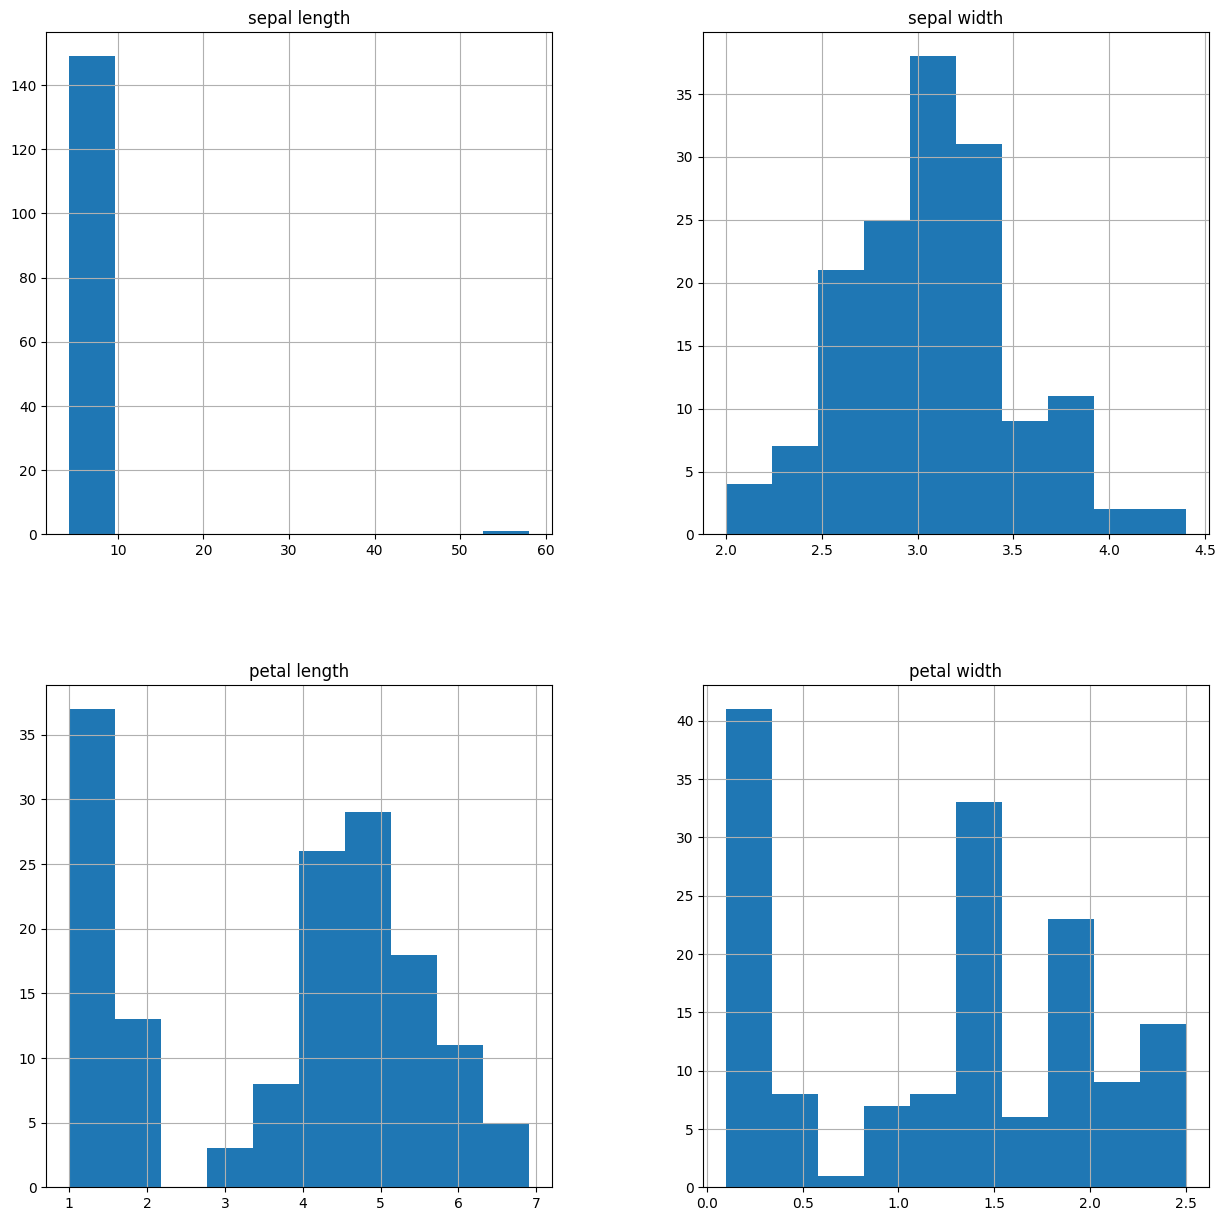

In [62]:
df.hist(figsize=(15, 15))
plt.show()
# plt.savefig('ML_0304.png', bbox_inches='tight')

In [63]:
df[df['sepal length'] == 58]

,sepal length,sepal width,petal length,petal width,class
143,58.0,2.7,5.1,1.9,Iris-virginica


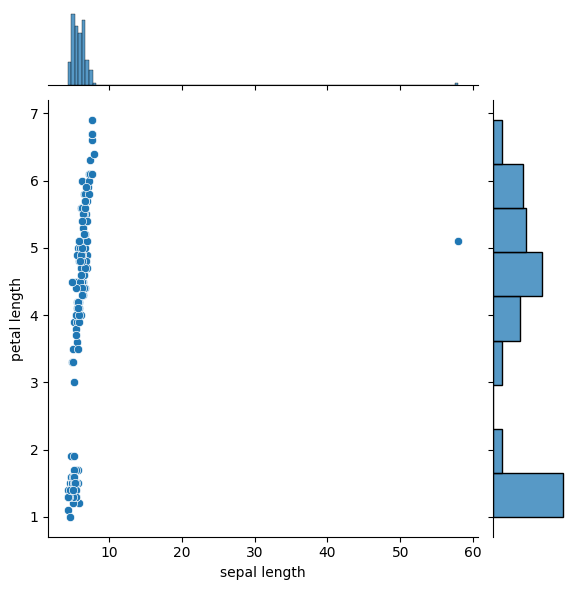

In [64]:
sns.jointplot(x=df['sepal length'], y=df['petal length'])
plt.show()
# plt.savefig('ML_0305.png', bbox_inches='tight')

In [65]:
df.loc[143,'sepal length'] = 5.8

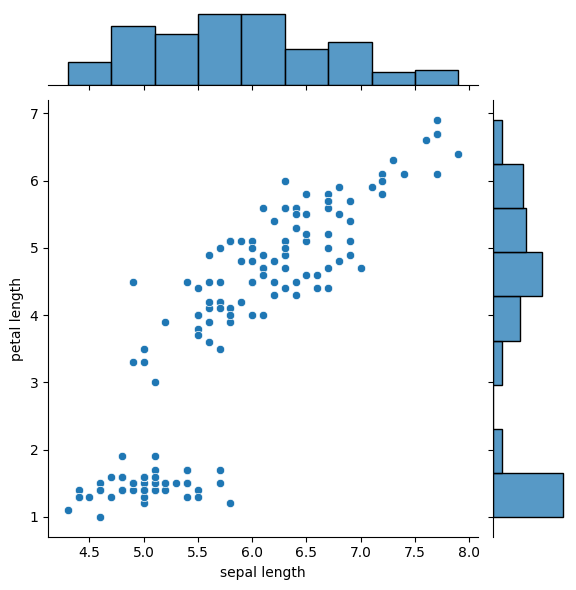

In [66]:
# p value:
# https://en.wikipedia.org/wiki/P-value
# http://www.dummies.com/education/math/statistics/what-a-p-value-tells-you-about-statistical-data/
# https://xkcd.com/1478/

sns.jointplot(x=df['sepal length'], y=df['petal length'])
plt.show()
# plt.savefig('ML_0306.png', bbox_inches='tight')

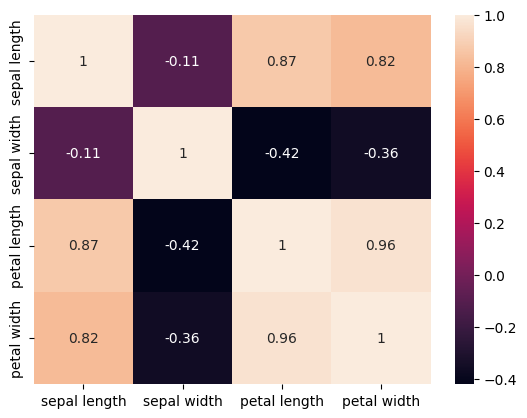

In [67]:
# https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

corrmat = df.corr()
sns.heatmap(corrmat, annot=True)
plt.show()
# plt.savefig('ML_0307.png', bbox_inches='tight')

In [68]:
df.to_csv('iris_cleaned.csv', index=False, header=True)

## Bonus Level: Mehr nette Visualisierungen

Iris-setosa             Axes(0.1,0.559091;0.363636x0.340909)
Iris-versicolor    Axes(0.536364,0.559091;0.363636x0.340909)
Iris-virginica              Axes(0.1,0.15;0.363636x0.340909)
dtype: object

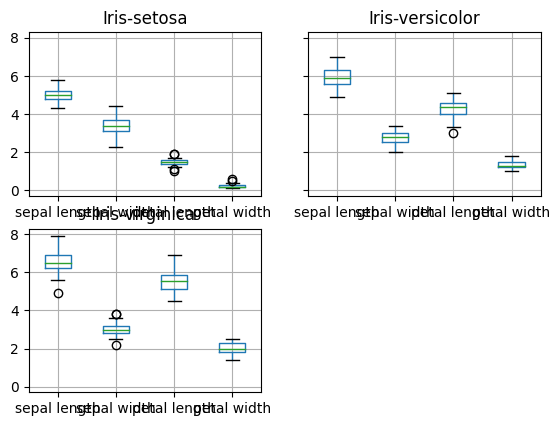

In [69]:
df.groupby('class').boxplot()

<Axes: >

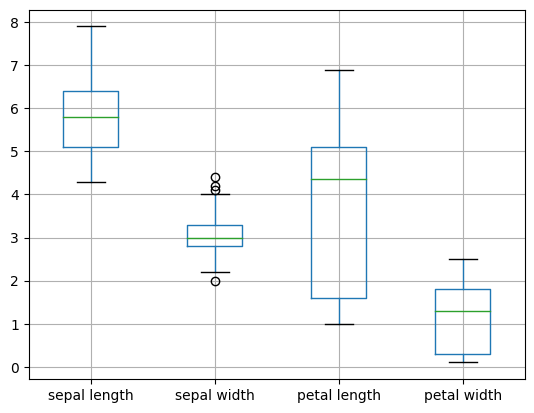

In [70]:
df.boxplot()

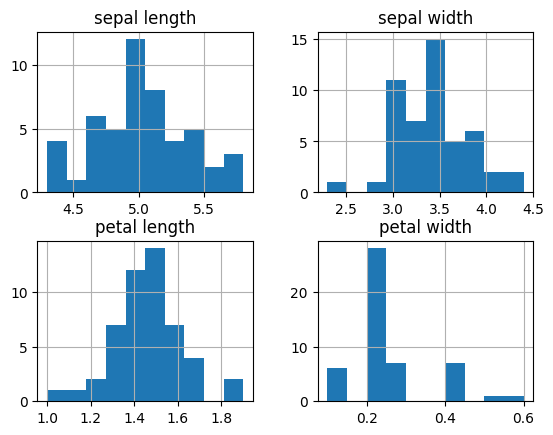

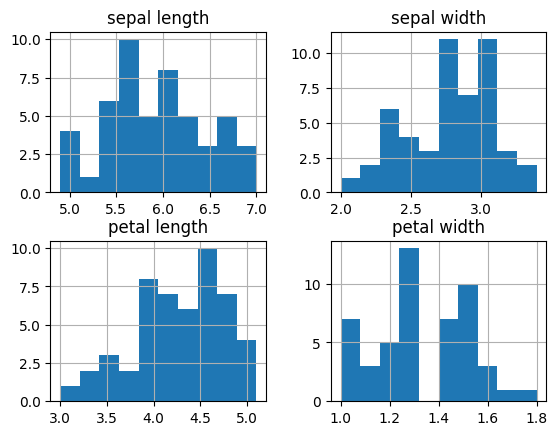

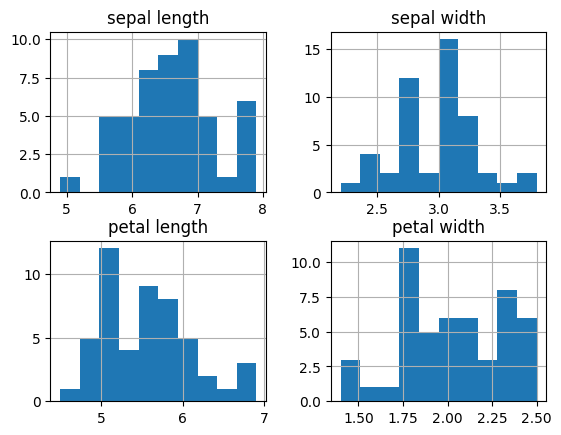

In [71]:
df.groupby('class').hist()
plt.show()

class
Iris-setosa        Axes(0.125,0.11;0.775x0.77)
Iris-versicolor    Axes(0.125,0.11;0.775x0.77)
Iris-virginica     Axes(0.125,0.11;0.775x0.77)
Name: sepal length, dtype: object

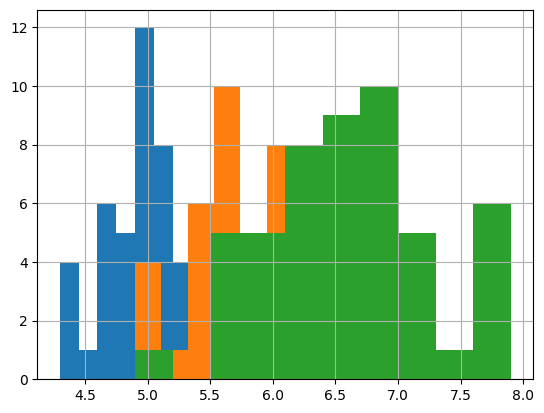

In [72]:
df.groupby('class')['sepal length'].hist()